# Machine Learning
This notebook is responsible for performing regression on the data collected from the Data Collection notebook.

## Reading in the database credentials

In [40]:
db_user = ""
db_pass = ""
db_name = ""
db_host = "localhost"
with open ("database_credentials.txt") as f:
    db_user = f.readline().strip()
    db_pass = f.readline().strip()
    db_name = f.readline().strip()

## Reading in the data

In [36]:
import MySQLdb as mdb
import numpy as np
import pandas as pd

In [41]:
try:
    con = mdb.connect(host=db_host, user=db_user, passwd=db_pass, db=db_name)
    #Read data
    databases = ["streams", "categories", "streamers"]
    dfs = {}
    for i in range(len(databases)):
        sql = """
        SELECT * FROM {}
        """.format(databases[i])
        dfs[databases[i]] = pd.read_sql(sql, con)
finally:
    if con:
        con.close()
dfs["categories"]

,id,category
0,6,counter-strike: global offensive
1,7,dota 2
2,1,fortnite
3,4,grand theft auto v
4,5,hearthstone
5,8,irl
6,2,league of legends
7,10,overwatch
8,3,playerunknown's battlegrounds
9,9,world of warcraft


## Visualizing data

In [42]:
#Plotting
%matplotlib inline
import matplotlib.pyplot as plt

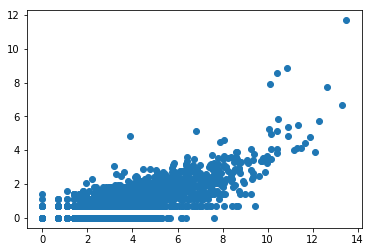

In [43]:
plt.scatter(np.log(dfs["streams"]["followers"] + 1), np.log(dfs["streams"]["current_viewers"] + 1))
plt.show()

## Regression
Below different regressors are fit to the data in an attempt to predict the target variable, current_viewers.
### Linear

In [51]:
random_state = 0

In [62]:
def safe_log(col):
    """
    Returns a safe log mapping of a pandas dataframe column log(val + 1)
    """
    return np.log(col + 1)

Coefficients: [ 0.31134741]
MSE: 0.57447390879
R2: 0.494876131673


C:\Users\unknown\AppData\Local\conda\conda\envs\twitch_views\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
C:\Users\unknown\AppData\Local\conda\conda\envs\twitch_views\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


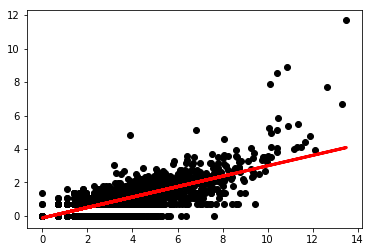

Coefficients: [ 0.2465306]
MSE: 0.646473842305
R2: 0.431567973757


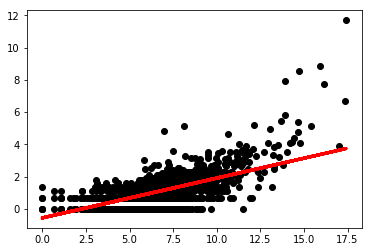

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

features = ["followers", "total_views"]
for f in features:
    #Split
    x_train, x_test, y_train, y_test = train_test_split(
        safe_log(dfs["streams"][f]),
        safe_log(dfs["streams"]["current_viewers"]),
        test_size=0.8,
        random_state=random_state)
    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    #Fit
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    #Predict
    y_pred = regr.predict(x_test)
    #Output metrics
    print("Coefficients: {}".format(regr.coef_))
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    #Plot
    plt.scatter(x_test, y_test, color="black")
    plt.plot(x_test, y_pred, color="red", linewidth=3)
    #plt.xticks(())
    #plt.yticks(())
    plt.show()